In [73]:
from prettytable import PrettyTable as PrettyTable
import random
import os

from src.Agent import Agent
from src.Environment import Environment

from src.utils import load_data, print_stats, plot_multiple_conf_interval

In [74]:
#!c1.4
data_path = "./input/"
models_path = "./models/"
df = load_data(data_path)

# ----------------------------- AGENTS COMPARISON --------------------------------
REPLAY_MEM_SIZE = 10000
BATCH_SIZE = 40
GAMMA = 0.98
EPS_START = 1
EPS_END = 0.12
EPS_STEPS = 300
LEARNING_RATE = 0.001
INPUT_DIM = 24
HIDDEN_DIM = 120
ACTION_NUMBER = 3
TARGET_UPDATE = 10
N_TEST = 10
TRADING_PERIOD = 4000

index = random.randrange(len(df) - TRADING_PERIOD - 1)

Shape of aggregated dataset: (34995, 4)


# ProfitDDQN Agent
profit_ddqn_return

In [75]:
double_dqn_agent = Agent(
    REPLAY_MEM_SIZE,
    BATCH_SIZE,
    GAMMA,
    EPS_START,
    EPS_END,
    EPS_STEPS,
    LEARNING_RATE,
    INPUT_DIM,
    HIDDEN_DIM,
    ACTION_NUMBER,
    TARGET_UPDATE,
    MODEL="dqn",
    DOUBLE=True,
)

Agent is using device:	cpu


In [76]:
train_size = int(TRADING_PERIOD * 0.8)
profit_ddqn_return = []

profit_test_env = Environment(
    df[index + train_size : index + TRADING_PERIOD], "profit"
)

In [77]:
# Profit Double DQN
cr_profit_ddqn_test, _ = double_dqn_agent.test(
    profit_test_env, model_name="profit_reward_double_dqn_model", path=models_path
)
profit_ddqn_return.append(profit_test_env.cumulative_return)
profit_test_env.reset()

 97%|█████████▋| 775/800 [00:01<00:00, 657.42it/s]


In [78]:
i = 0
while i < N_TEST:
    print("Test nr. %s" % str(i + 1))
    index = random.randrange(len(df) - TRADING_PERIOD - 1)

    profit_test_env = Environment(
        df[index + train_size : index + TRADING_PERIOD], "profit"
    )
    
    # Profit Double DQN
    cr_profit_ddqn_test, _ = double_dqn_agent.test(
        profit_test_env, model_name="profit_reward_double_dqn_model", path=models_path
    )
    profit_ddqn_return.append(profit_test_env.cumulative_return)
    profit_test_env.reset()
    
    i += 1

Test nr. 1


 97%|█████████▋| 775/800 [00:00<00:00, 1414.73it/s]


Test nr. 2


 97%|█████████▋| 775/800 [00:00<00:00, 929.85it/s] 


Test nr. 3


 97%|█████████▋| 775/800 [00:00<00:00, 1025.53it/s]


Test nr. 4


 97%|█████████▋| 775/800 [00:00<00:00, 1112.28it/s]


Test nr. 5


 97%|█████████▋| 775/800 [00:00<00:00, 1336.81it/s]


Test nr. 6


 97%|█████████▋| 775/800 [00:01<00:00, 748.19it/s]


Test nr. 7


 97%|█████████▋| 775/800 [00:00<00:00, 1052.33it/s]


Test nr. 8


 97%|█████████▋| 775/800 [00:00<00:00, 1582.87it/s]


Test nr. 9


 97%|█████████▋| 775/800 [00:01<00:00, 505.40it/s]


Test nr. 10


 97%|█████████▋| 775/800 [00:00<00:00, 1092.41it/s]


In [79]:
i = 0
while i < N_TEST:
    print("Test nr. %s" % str(i + 1))
    index = random.randrange(len(df) - TRADING_PERIOD - 1)

    sharpe_test_env = Environment(
        df[index + train_size : index + TRADING_PERIOD], "sr"
    )

    # Sharpe Double DQN
    cr_sharpe_ddqn_test, _ = double_dqn_agent.test(
        sharpe_test_env, model_name="profit_reward_double_dqn_model", path=models_path
    )
    sharpe_ddqn_return.append(sharpe_test_env.cumulative_return)
    sharpe_test_env.reset()    
    i += 1

Test nr. 1


 97%|█████████▋| 775/800 [00:01<00:00, 618.46it/s]


Test nr. 2


 97%|█████████▋| 775/800 [00:01<00:00, 731.52it/s]


Test nr. 3


 97%|█████████▋| 775/800 [00:00<00:00, 919.66it/s] 


Test nr. 4


 97%|█████████▋| 775/800 [00:01<00:00, 693.33it/s]


Test nr. 5


 97%|█████████▋| 775/800 [00:01<00:00, 527.50it/s]


Test nr. 6


 97%|█████████▋| 775/800 [00:01<00:00, 624.62it/s] 


Test nr. 7


 97%|█████████▋| 775/800 [00:01<00:00, 592.54it/s]


Test nr. 8


 97%|█████████▋| 775/800 [00:01<00:00, 419.18it/s]


Test nr. 9


 97%|█████████▋| 775/800 [00:01<00:00, 579.28it/s]

Test nr. 10



 97%|█████████▋| 775/800 [00:01<00:00, 467.94it/s]


In [80]:
t = PrettyTable(
    [
        "Trading System",
        "Avg. Return (%)",
        "Max Return (%)",
        "Min Return (%)",
        "Std. Dev.",
    ]
)
print_stats("ProfitDDQN", profit_ddqn_return, t)
print(t)

+----------------+-----------------+----------------+----------------+-----------+
| Trading System | Avg. Return (%) | Max Return (%) | Min Return (%) | Std. Dev. |
+----------------+-----------------+----------------+----------------+-----------+
|   ProfitDDQN   |       1.04      |     37.33      |     -14.65     |    4.08   |
+----------------+-----------------+----------------+----------------+-----------+


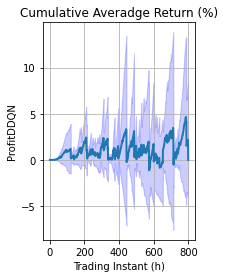

In [81]:
plot_multiple_conf_interval(
    [
        "ProfitDDQN",
    ],
    [
        profit_ddqn_return,
    ],
)